In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

In [2]:
main_folder = '/ghds/cv19/analysis'
flowcell_id = '201125_NB552478_0007_AHHJL2BGXG'
path = os.path.join(main_folder, flowcell_id)
df = pd.read_csv(os.path.join(path, 'c19_call.hdr.tsv'), sep='\t')

In [3]:
df = df[df['sample_type'] == 'Sample']

df['row'] = df['pos_tube_rack'].str[14]
df['column'] = df['pos_tube_rack'].str.extract(r'.*?:[A-H](\d+)').astype('int')
df['RBP'] = df['pos_tube_rack'].str.extract(r'(.*?):.*$')

df['positive_detection'] = df['median_covid_ratio'].ge(0.01)
df['sample_count'] = 1

df.drop(df.query("RBP == 'RBP201022A176'|RBP == 'RBP201022A179'").query("column > 5").index, inplace=True)

mapping = {'A':0, 'B':0,
           'C':100, 'D':100,
           'E':50, 'F':50,
           'G':25, 'H':25
            }

In [4]:
df.RBP.unique()

array(['RBP201022A170', 'RBP201022A178', 'RBP201022A179', 'RBP201022A177',
       'RBP201022A176', 'RBP201022A223', 'RBP201022A224', 'RBP201112A210'],
      dtype=object)

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


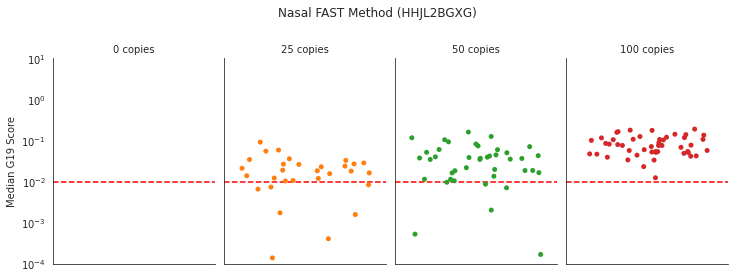

In [5]:
p2_3 = df[df['pos_tube_rack'].str.contains(('RBP201022A177|RBP201022A178'))]
p2_3['condition'] = p2_3['row'].map(mapping)

sns.set_style('white')

g = sns.FacetGrid(p2_3, col='condition', hue='condition')

g.map(sns.stripplot, 'condition', 'median_covid_ratio', jitter=0.4, size=5)\
    .set(xticks=[], yscale='log', ylim=[0.0001, 10])
g.map(plt.axhline, y=0.01, ls='--', c='red')

g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Nasal FAST Method (HHJL2BGXG)')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

In [6]:
p2_3_calls = pd.get_dummies(p2_3.call)
p2_3_passqc = pd.get_dummies(p2_3.flags)
p2_3 = pd.concat([p2_3, p2_3_calls, p2_3_passqc], axis=1)

p2_3.groupby('condition').agg({'detected':'sum',
                               'not_detected':'sum',
                               'pass':'sum',
                               'sample_count':'sum',
                               'positive_detection':'mean'
                              })

,detected,not_detected,pass,sample_count,positive_detection
condition,,,,,
0,0,44,44,44,0.000000
25,23,25,48,48,0.479167
50,35,13,48,48,0.729167
100,48,0,48,48,1.000000


/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


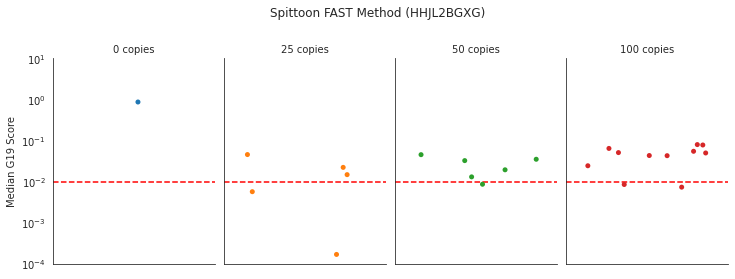

In [7]:
p1_4 = df[df['pos_tube_rack'].str.contains(('RBP201022A176|RBP201022A179'))]
p1_4['condition'] = p1_4['row'].map(mapping)
df['positive_detection'] = df['median_covid_ratio'].ge(0.01)

sns.set_style('white')

g = sns.FacetGrid(p1_4, col='condition', hue='condition')
g.map(sns.stripplot, 'condition', 'median_covid_ratio', jitter=0.4, size=5)\
    .set(xticks=[], yscale='log', ylim=[0.0001, 10])
g.map(plt.axhline, y=0.01, ls='--', c='red')
g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Spittoon FAST Method (HHJL2BGXG)')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

In [8]:
p1_4_calls = pd.get_dummies(p1_4.call)
p1_4_passqc = pd.get_dummies(p1_4.flags)
p1_4 = pd.concat([p1_4, p1_4_calls, p1_4_passqc], axis=1)

p1_4.groupby('condition').agg({'detected':'sum',
                               'not_detected':'sum',
                               'pass':'sum',
                               'sample_count':'sum',
                               'positive_detection':'mean'
                              })

,detected,not_detected,pass,sample_count,positive_detection
condition,,,,,
0,1,15,16,16,0.0625
25,3,17,20,20,0.1500
50,5,15,20,20,0.2500
100,9,11,20,20,0.4500


In [9]:
# all_samples[all_samples['RBP'] == 'RBP201022A170'].sort_values(by=['column', 'row']).groupby(
#     'run_sample_id', sort=False).agg({'covid_ratio':'median'})

## Heatmaps

In [10]:
all_samples = pd.read_csv(os.path.join(path, 'c19_read_counts.hdr.tsv'), sep='\t').dropna(subset=['run_sample_id']).sort_values(by=['pos_tube_rack', 'pos_extraction'])
all_samples['RBP'] = all_samples.pos_tube_rack.str[:13]
all_samples['primer_plate'] = all_samples.pos_extraction.str[:13]
all_samples['row'] = all_samples.pos_extraction.str[14]
all_samples['column'] = all_samples.pos_extraction.str[15:].astype('int')

### Fast Nasal/Saliva

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/home/bshih/miniconda3/envs/c19dash/lib/python

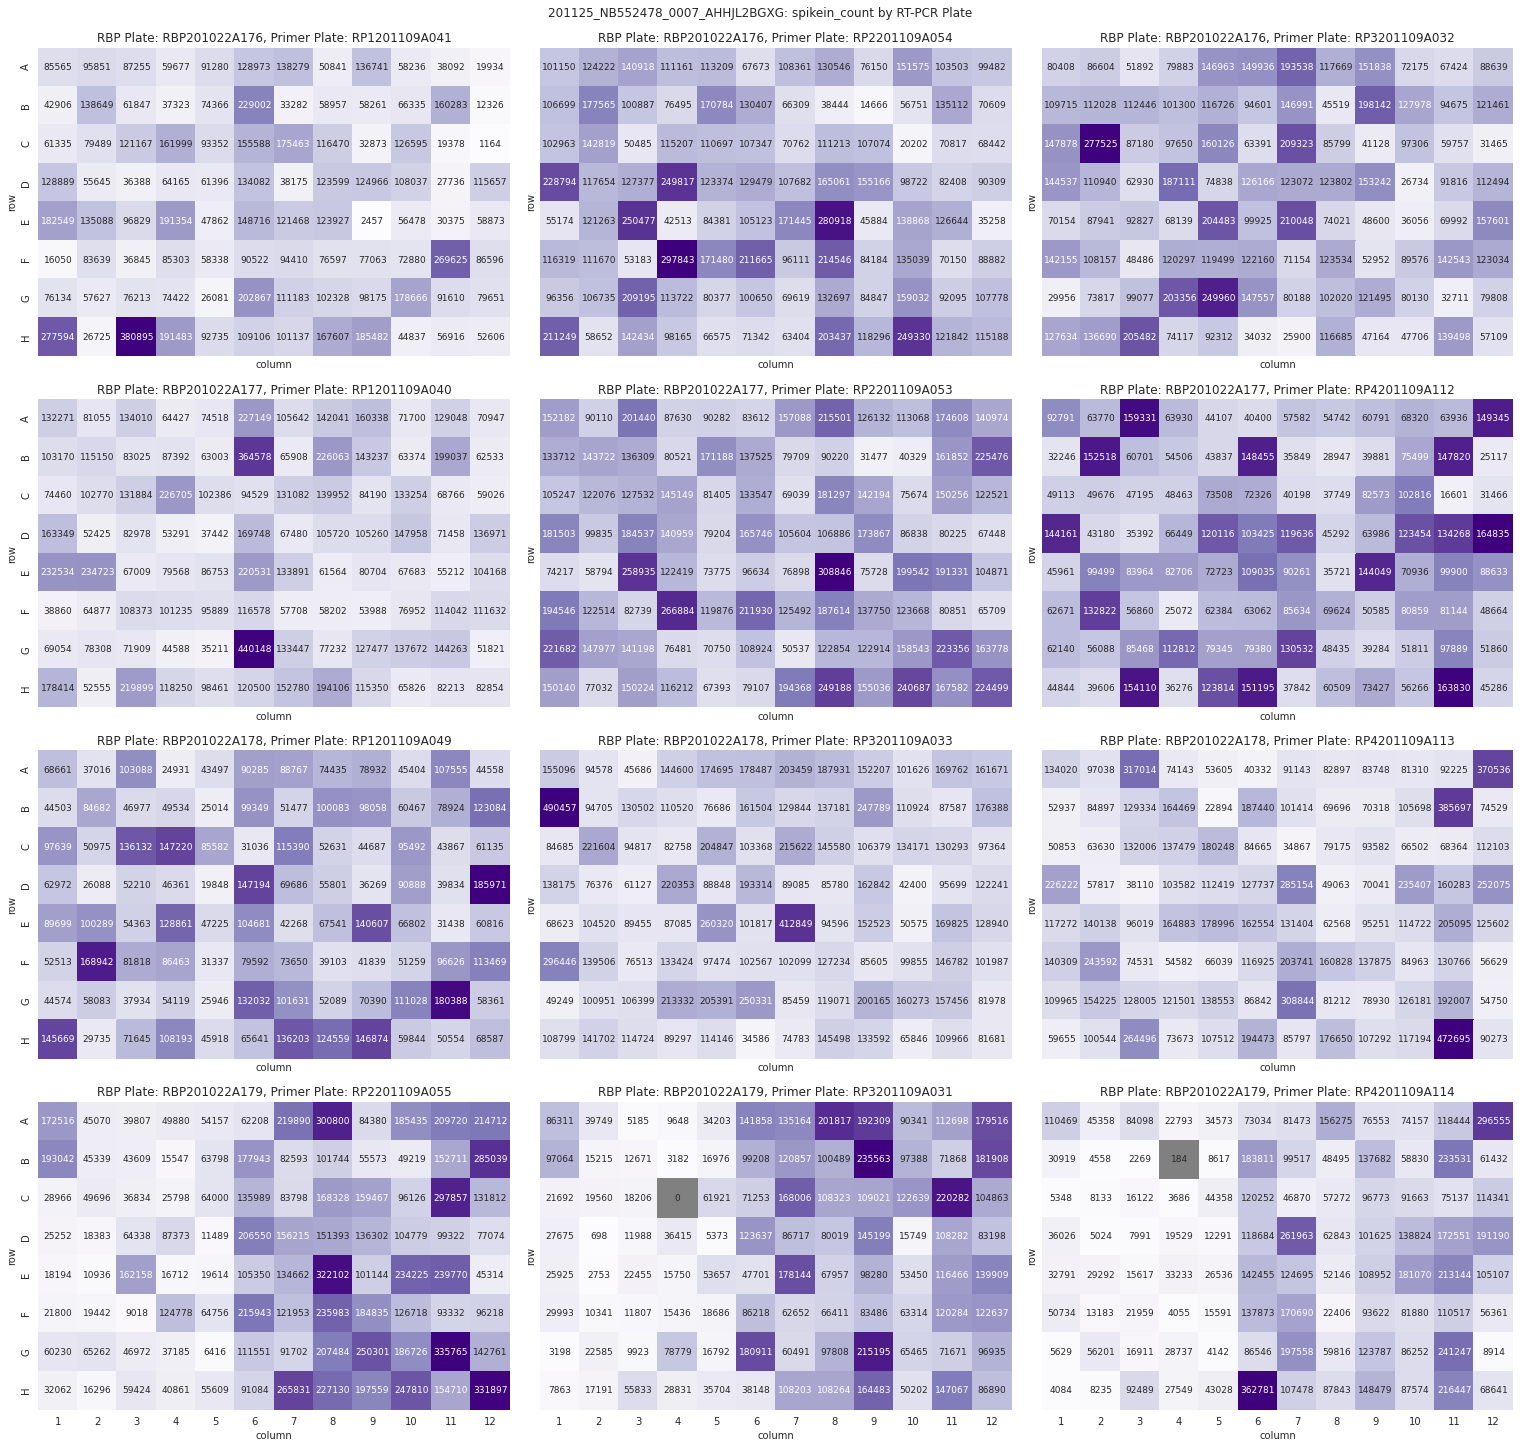

In [11]:
total_cols = 3
total_rows = 4
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, sharex=True, sharey=True, 
                        figsize=(7*total_cols, 5*total_rows), constrained_layout=True, squeeze=False)

fig.suptitle(f'{flowcell_id}: spikein_count by RT-PCR Plate')
fig.set_facecolor('white')

for i,k in zip(all_samples.RBP.unique()[1:5], range(4)):
    sub_RBP = all_samples[all_samples['RBP'] == i].sort_values(by='primer_plate')
    
    for l,m in zip(sub_RBP.primer_plate.unique(), range(3)):
        sub_primer = sub_RBP[sub_RBP['primer_plate'] == l]
        sub_primer.spikein_count.astype('int64')
        
        plate_map = sub_primer.iloc[:, [22, 23, 8]].pivot(index='row', columns='column', values='spikein_count').fillna(0)

        for j in range(len(plate_map.columns) + 1, 13):
            plate_map[f'{j}'] = 0
            
        plate_map = plate_map.astype(dtype='int')
        
        row = k % total_rows
        pos = m % total_cols
        
        fig = sns.heatmap(plate_map, annot=True, cbar=False, cmap="Purples", 
                    vmin=500, fmt='d', annot_kws={"fontsize":9}, ax=axs[row][pos])
        
        fig = sns.heatmap(plate_map, mask=plate_map > 500, cmap=ListedColormap(['grey']), annot=False, ax=axs[row][pos], cbar=False)

        axs[row][pos].set_title(f'RBP Plate: {i}, Primer Plate: {l}')
            
# plt.savefig('fastspittoon_nasal', dpi=300)


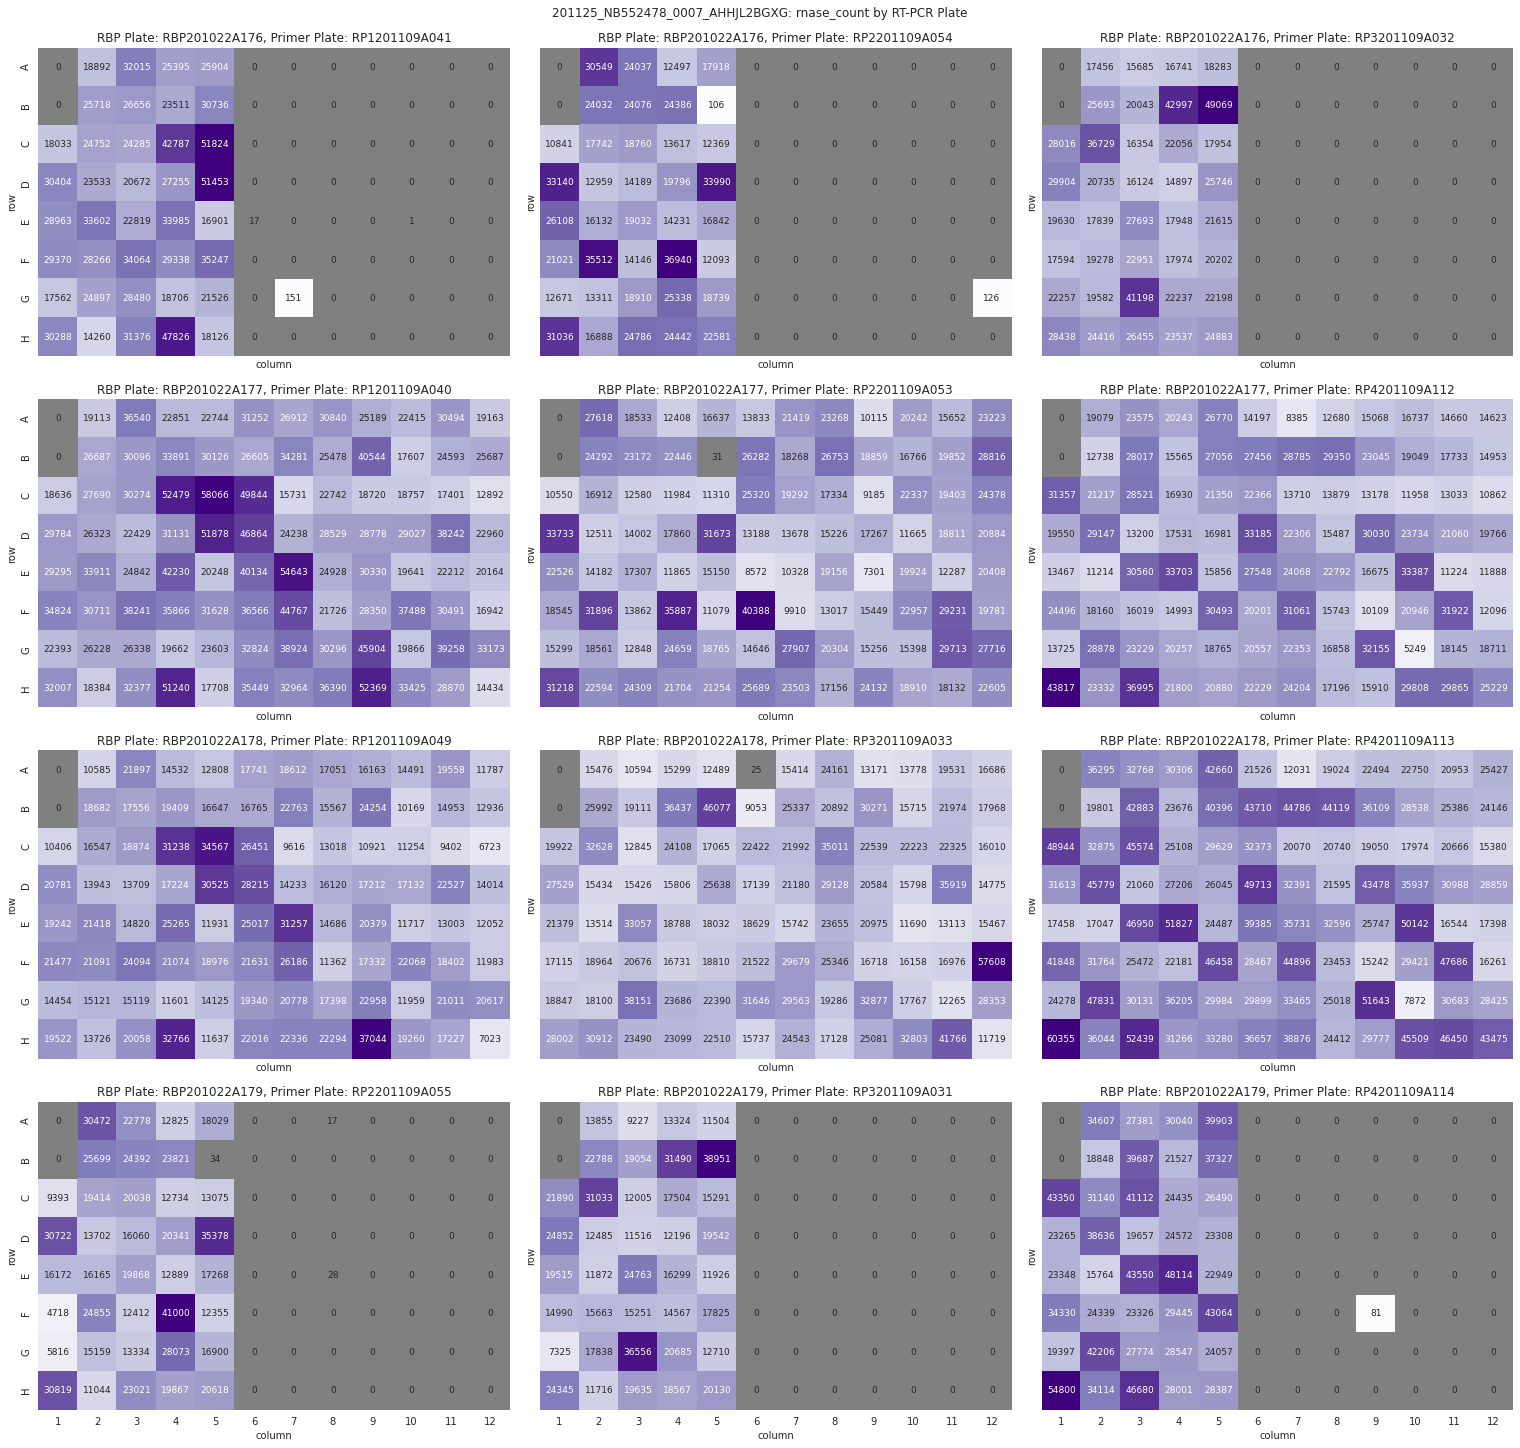

In [12]:
total_cols = 3
total_rows = 4
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, sharex=True, sharey=True, 
                        figsize=(7*total_cols, 5*total_rows), constrained_layout=True, squeeze=False)

fig.suptitle(f'{flowcell_id}: rnase_count by RT-PCR Plate')
fig.set_facecolor('white')

for i,k in zip(all_samples.RBP.unique()[1:5], range(4)):
    sub_RBP = all_samples[all_samples['RBP'] == i].sort_values(by='primer_plate')
    
    for l,m in zip(sub_RBP.primer_plate.unique(), range(3)):
        sub_primer = sub_RBP[sub_RBP['primer_plate'] == l]
        sub_primer.spikein_count.astype('int64')
        
        plate_map = sub_primer.iloc[:, [22, 23, 7]].pivot(index='row', columns='column', values='rnase_count').fillna(0)

        for j in range(len(plate_map.columns) + 1, 13):
            plate_map[f'{j}'] = 0
            
        plate_map = plate_map.astype(dtype='int')
        
        row = k % total_rows
        pos = m % total_cols
        
        fig = sns.heatmap(plate_map, annot=True, cbar=False, cmap="Purples", 
                    vmin=500, fmt='d', annot_kws={"fontsize":9}, ax=axs[row][pos])
        
        fig = sns.heatmap(plate_map, mask=plate_map > 50, cmap=ListedColormap(['grey']), annot=False, ax=axs[row][pos], cbar=False)

        axs[row][pos].set_title(f'RBP Plate: {i}, Primer Plate: {l}')
            
# plt.savefig('fastspittoon_nasal', dpi=300)


### Spittoon Aliquoting

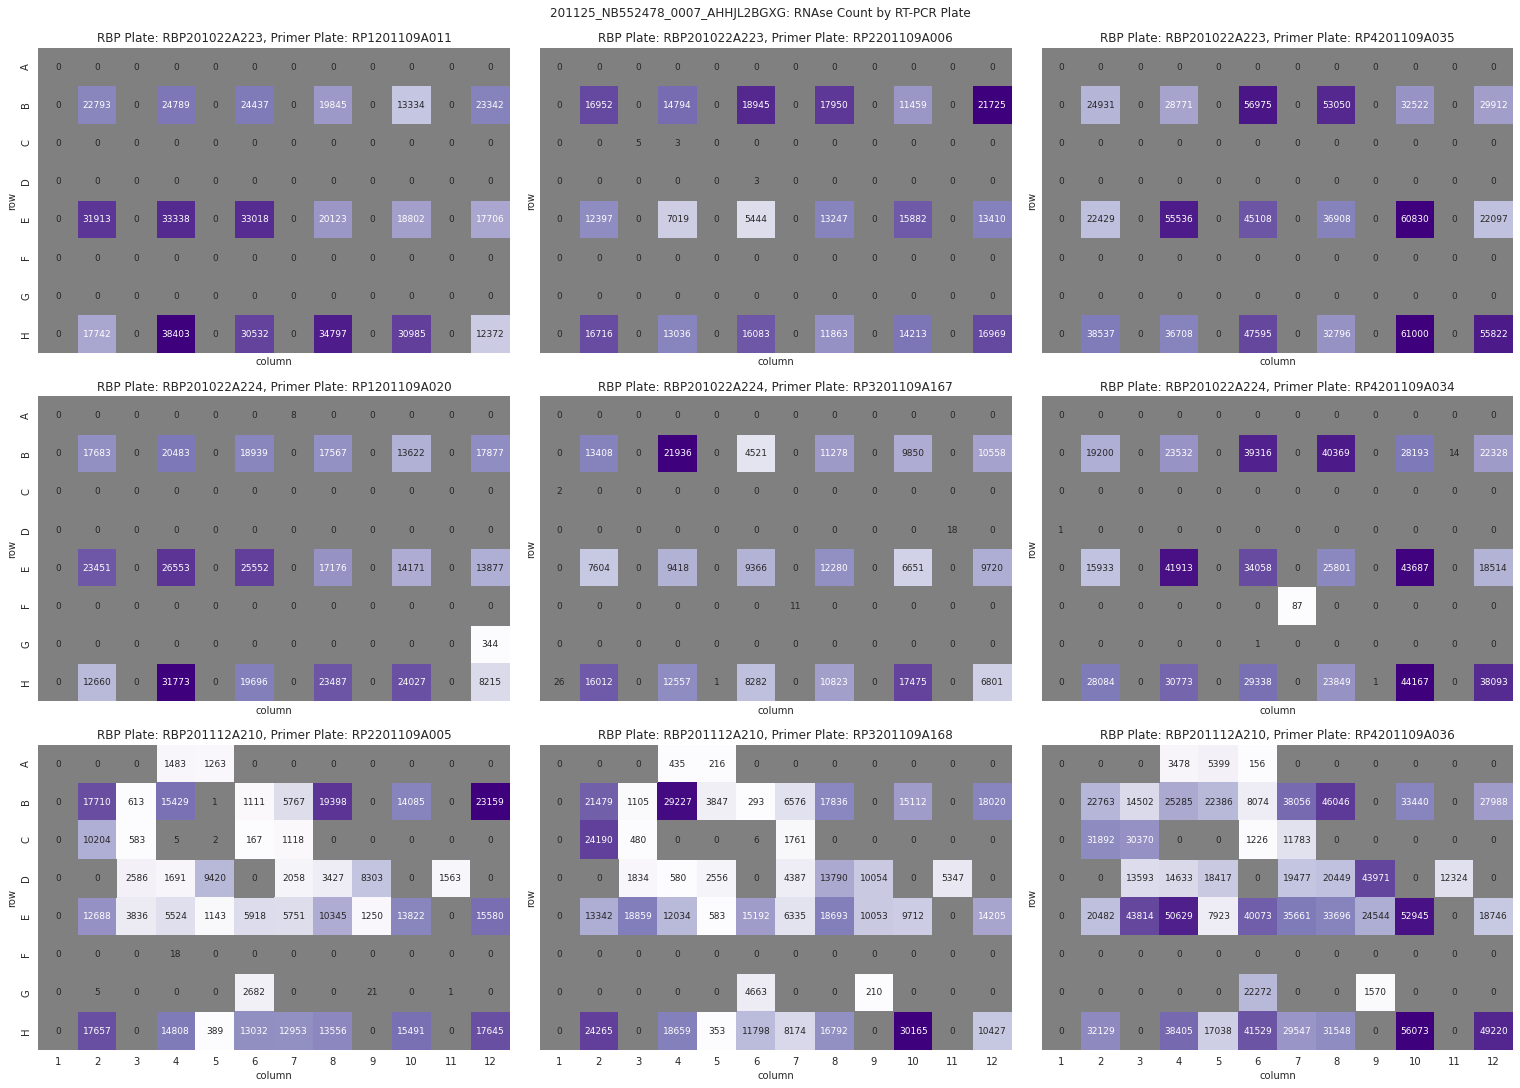

In [13]:
total_cols = 3
total_rows = 3
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, sharex=True, sharey=True, 
                        figsize=(7*total_cols, 5*total_rows), constrained_layout=True, squeeze=False)

fig.suptitle(f'{flowcell_id}: RNAse Count by RT-PCR Plate')
fig.set_facecolor('white')

for i,k in zip(all_samples.RBP.unique()[5:], range(3)):
    sub_RBP = all_samples[all_samples['RBP'] == i].sort_values(by='primer_plate')
    
    for l,m in zip(sub_RBP.primer_plate.unique(), range(3)):
        sub_primer = sub_RBP[sub_RBP['primer_plate'] == l]
        sub_primer.rnase_count.astype('int64')
        
        plate_map = sub_primer.iloc[:, [22, 23, 7]].pivot(index='row', columns='column', values='rnase_count').fillna(0)

        for j in range(len(plate_map.columns) + 1, 13):
            plate_map[f'{j}'] = 0
            
        plate_map = plate_map.astype(dtype='int')
        
        row = k % total_rows
        pos = m % total_cols
        
        fig = sns.heatmap(plate_map, annot=True, cbar=False, cmap="Purples", 
                    vmin=500, fmt='d', annot_kws={"fontsize":9}, ax=axs[row][pos])
        
        fig = sns.heatmap(plate_map, mask=plate_map > 50, cmap=ListedColormap(['grey']), annot=False, ax=axs[row][pos], cbar=False)

        axs[row][pos].set_title(f'RBP Plate: {i}, Primer Plate: {l}')
            
# plt.savefig('spittoon_aliquot', dpi=300)
